## Capstone - Battle of Neighborhoods 

###  😋 Exploring best restaurants in Taipei

Rachel Chen @Taipei 2020

### 🔸 Introduction

__This final project explores the best locations for restaurant in Taipei, Taiwan.__ Taipei, the capital of Taiwan, is known for its diverse culture and many fine restaurants providing vaious cuisines. Since there are too many options for first-time tourists to Taipei, we want to provide best restaurants information to visitors.
還要補一些背景描述 數字之類的 = =

ref:" Food Business News stated that worldwide pasta sales were up for the second year in a row with the United Sates holding the largest market (Donley, 2018). New York is a major metropolitan area with more than 8.4 million (Quick Facts, 2018) people living within city limits. Most of the Italian immigration into the United States occurred during the late 19th and early 20th century with over two million immigrants between 1900 and 1910. Italian families first settled in Little Italy’s neighborhood around Mulberry Street as has continued to thrive ever since. With almost 700,000 Manhattan inhabitants reporting Italian ancestry, the need to find and enjoy Italian cuisine is on the rise. This report explores which neighborhoods and boroughs of New York City have the most as well as the best Italian restaurants. Additionally, I will attempt to answer the questions “Where should I open an Italian Restaurant?” and “Where should I stay If I want great Italian food?”"


_Reference:_
[Taipei-Wikipedia](https://en.wikipedia.org/wiki/Taipei)

### 🔸 Data


For this project we need following data:

1️⃣ Taipei data that contains all districts and with their latitude and longitude.

_Datasource : [Taipei-Wikipedia](https://en.wikipedia.org/wiki/Taipei#Administrative_divisions)_

Description: We will scrap Taipei districts table from Wikipedia and get the coordinates of districts using geocoder class of __Geopy__ client.

2️⃣ Restaurants in each neighborhoods of Taipei.

_Data source: [FourSquare API](https://developer.foursquare.com/)_

Description : By using __Foursquare APIs__ via the request library we will get all the venues in each neighborhood. We can filter these venues to get only "Restaurant". Therefore, we can get data of all restaurants in Taipei City including their name, address, latitudes, longitude, and ratings.


### 🔸 Methodology

• FourSquare API will be used to locate all restaurants in Taipei. Ratings by users will be counted and added to the dataframe.

• Data will be sorted based on ratings.

• Finally, the data be will be visualized by using __folium__.

### 1) First, we import libraries that will be used in this project.

In [372]:
import requests, json # To handle requests
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

from bs4 import BeautifulSoup # Import this to scrape web pages

import pandas as pd # For data analysis
import numpy as np

!pip install folium
import folium # For drawing a map

print('Import finished')

Import finished


### 2) Second, we scrap the Wikipedia page to get the table of districts in Taipei and create a data-frame.

In [176]:
url = 'https://en.wikipedia.org/wiki/Taipei'
df = pd.read_html(url, header = None)[9]
df

Map             District  \
                                                  Map            Name[100]   
0   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Beitou   
1   Beitou Shilin Neihu Zhongshan Song-shan Datong...  Daan (Da-an, Da'an)   
2   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Datong   
3   Beitou Shilin Neihu Zhongshan Song-shan Datong...    Nangang (Nankang)   
4   Beitou Shilin Neihu Zhongshan Song-shan Datong...                Neihu   
5   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Shilin   
6   Beitou Shilin Neihu Zhongshan Song-shan Datong...             Songshan   
7   Beitou Shilin Neihu Zhongshan Song-shan Datong...               Wanhua   
8   Beitou Shilin Neihu Zhongshan Song-shan Datong...              Wenshan   
9   Beitou Shilin Neihu Zhongshan Song-shan Datong...                Xinyi   
10  Beitou Shilin Neihu Zhongshan Song-shan Datong...            Zhongshan   
11  Beitou Shilin Neihu Zhongshan Song-shan Datong...           Zhongzheng   

                                                      Population(Jan. 2016)  \
   Chinese[101]      Pinyin   Wade–Giles   Pe̍h-ōe-jī Population(Jan. 2016)   
0           北投區      Běitóu     Pei-t'ou      Pak-tâu                257922   
1           大安區       Dà'ān        Ta-an       Tāi-an                312909   
2           大同區      Dàtóng     Ta-t'ung     Tāi-tông                131029   
3           南港區     Nángǎng     Nan-kang     Lâm-káng                122296   
4           內湖區       Nèihú       Nei-hu       Lāi-ô͘                287726   
5           士林區      Shìlín     Shih-lin       Sū-lîm                290682   
6           松山區    Sōngshān    Sung-shan    Siông-san                209689   
7           萬華區      Wànhuá      Wan-hua     Báng-kah                194314   
8           文山區     Wénshān     Wen-shan      Bûn-san                275433   
9           信義區       Xìnyì      Hsin-yi       Sìn-gī                229139   
10          中山區   Zhōngshān   Chung-shan    Tiong-san                231286   
11          中正區  Zhōngzhèng  Chung-cheng  Tiong-chèng                162549   

   Area(km2) Postalcode  
   Area(km2) Postalcode  
0    56.8216        112  
1    11.3614        106  
2     5.6815        103  
3    21.8424        115  
4    31.5787        114  
5    62.3682        111  
6     9.2878        105  
7     8.8522        108  
8    31.5090        116  
9    11.2077        110  
10   13.6821        104  
11    7.6071        100

In [177]:
# Remove redundant header column
df.columns = df.columns.droplevel(-2)
df

,Map,Name[100],Chinese[101],Pinyin,Wade–Giles,Pe̍h-ōe-jī,Population(Jan. 2016),Area(km2),Postalcode
0,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Beitou,北投區,Běitóu,Pei-t'ou,Pak-tâu,257922,56.8216,112
1,Beitou Shilin Neihu Zhongshan Song-shan Datong...,"Daan (Da-an, Da'an)",大安區,Dà'ān,Ta-an,Tāi-an,312909,11.3614,106
2,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Datong,大同區,Dàtóng,Ta-t'ung,Tāi-tông,131029,5.6815,103
3,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Nangang (Nankang),南港區,Nángǎng,Nan-kang,Lâm-káng,122296,21.8424,115
4,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Neihu,內湖區,Nèihú,Nei-hu,Lāi-ô͘,287726,31.5787,114
5,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Shilin,士林區,Shìlín,Shih-lin,Sū-lîm,290682,62.3682,111
6,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Songshan,松山區,Sōngshān,Sung-shan,Siông-san,209689,9.2878,105
7,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Wanhua,萬華區,Wànhuá,Wan-hua,Báng-kah,194314,8.8522,108
8,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Wenshan,文山區,Wénshān,Wen-shan,Bûn-san,275433,31.5090,116
9,Beitou Shilin Neihu Zhongshan Song-shan Datong...,Xinyi,信義區,Xìnyì,Hsin-yi,Sìn-gī,229139,11.2077,110


In [178]:
# Drop rows that we don't need
df.drop('Map', axis=1, inplace = True)
df.drop('Pinyin', axis=1, inplace = True)
df.drop('Wade–Giles', axis=1, inplace = True)
df.drop('Pe̍h-ōe-jī', axis=1, inplace = True)

# Rename header columns
df.rename(columns={df.columns[0] : 'EnName',
                   df.columns[1] : 'ChName',
                   df.columns[2] : 'Population',
                   df.columns[3] : 'Area'
                  }, inplace = True)
df

,EnName,ChName,Population,Area,Postalcode
0,Beitou,北投區,257922,56.8216,112
1,"Daan (Da-an, Da'an)",大安區,312909,11.3614,106
2,Datong,大同區,131029,5.6815,103
3,Nangang (Nankang),南港區,122296,21.8424,115
4,Neihu,內湖區,287726,31.5787,114
5,Shilin,士林區,290682,62.3682,111
6,Songshan,松山區,209689,9.2878,105
7,Wanhua,萬華區,194314,8.8522,108
8,Wenshan,文山區,275433,31.5090,116
9,Xinyi,信義區,229139,11.2077,110


In [179]:
# Use the .shape method to print the number of rows of dataframe
df.shape

(12, 5)

### 3) Now that we have our initial data, we continue to add Geospital data to out dataframe.

In [180]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [181]:
# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent = "Taipei_explorer")

df['Major_Dist_Coord']= df['ChName'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace = True)
df

,EnName,ChName,Population,Area,Postalcode,Latitude,Longitude
0,Beitou,北投區,257922,56.8216,112,25.132419,121.501379
1,"Daan (Da-an, Da'an)",大安區,312909,11.3614,106,25.026515,121.534395
2,Datong,大同區,131029,5.6815,103,46.107127,124.681939
3,Nangang (Nankang),南港區,122296,21.8424,115,25.054578,121.606600
4,Neihu,內湖區,287726,31.5787,114,25.069664,121.588998
5,Shilin,士林區,290682,62.3682,111,25.091840,121.524207
6,Songshan,松山區,209689,9.2878,105,25.049885,121.577272
7,Wanhua,萬華區,194314,8.8522,108,25.031933,121.499332
8,Wenshan,文山區,275433,31.5090,116,24.989786,121.570458
9,Xinyi,信義區,229139,11.2077,110,25.033345,121.566896


### 4) Clustering Neighborhoods in Taipei

#### Let's get the geographical coordinates of Taipei.

In [183]:
address = 'Taipei'

geolocator = Nominatim(user_agent = "Taipei_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Taipei are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Taipei are 25.0375198, 121.5636796.


#### Next, we can visualize the 11 neighborhoods in Taipei.

In [375]:
# Create a map of Taipei using latitude and longitude values by using folium
map_taipei = folium.Map(location=[latitude, longitude], zoom_start=11)

 # Add markers to map of Taipei
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['EnName']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = label,
        color = 'purple',
        fill = True,
        fill_color = 'yellow',
        fill_opacity = 0.8,
        parse_html = False).add_to(map_taipei) 

print('Please be noted that the map may not show on Github, please refer to README file for map_taipei.')
map_taipei

Please be noted that the map may not show on Github, please refer to README file for map_taipei.


#### Next, we are going to start utilizing the __Foursquare API__ to explore the neighborhoods and segment them.

#### Apply your credential ID to __FourSquare__.

In [286]:
# Define FourSquare Credentials and Version>
CLIENT_ID = 'L41E5UIA1WKZ5JNS3QQBYO5NGSEQZ32OGXJOVLORP22FADRZ' # Your FourSquare ID
CLIENT_SECRET = 'PPSP1AHMM5FMVNCUOVZRPUT0IJL4QN5C3EGXLO0OU4V1YFCO' # Your FourSquare Secret
VERSION = '20201024'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L41E5UIA1WKZ5JNS3QQBYO5NGSEQZ32OGXJOVLORP22FADRZ
CLIENT_SECRET:PPSP1AHMM5FMVNCUOVZRPUT0IJL4QN5C3EGXLO0OU4V1YFCO


In [287]:
df.loc[1, 'EnName']

"Daan (Da-an, Da'an)"

#### Now, let's get the top 100 venues that are in Daan District within a radius of 1000 meters. Daan District is chosen as an example since it's one of the most competitive business area.

In [296]:
neighborhood_latitude = df.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[1, 'EnName'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Daan (Da-an, Da'an) are 25.0265152, 121.534395.


In [359]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=L41E5UIA1WKZ5JNS3QQBYO5NGSEQZ32OGXJOVLORP22FADRZ&client_secret=PPSP1AHMM5FMVNCUOVZRPUT0IJL4QN5C3EGXLO0OU4V1YFCO&v=20201024&ll=25.0265152,121.534395&radius=500&limit=100'

In [360]:
results = requests.get(url).json()

#### We creat a function that extracts the category of the venue.

In [361]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [362]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-362-a747a20969f3>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,青田七六,Café,25.028049,121.532596
1,Wistaria Tea House (紫藤廬),Tea Room,25.024553,121.534507
2,貳月咖啡,Café,25.026933,121.532086
3,Daan Forest Park (大安森林公園),Park,25.029842,121.535810
4,Jack & Nana Coffee Store,Coffee Shop,25.026745,121.531656


In [363]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

18 venues were returned by Foursquare.


In [364]:
print ('Found {} unique categories in Daan District.'.format(nearby_venues['categories'].value_counts().shape[0]))

Found 11 unique categories in Daan District.


In [365]:
print (nearby_venues['categories'].value_counts()[0:49])

Café                     5
Convenience Store        3
Park                     2
Vietnamese Restaurant    1
Bakery                   1
Chinese Restaurant       1
Dumpling Restaurant      1
Food Stand               1
Tea Room                 1
Coffee Shop              1
Deli / Bodega            1
Name: categories, dtype: int64


### Explore Neighborhoods in Taipei.

In [344]:
def getNearbyVenues(names, latitudes, longitudes, radius = 1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [316]:
Taipei_venues = getNearbyVenues(names=df['EnName'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Beitou
Daan (Da-an, Da'an)
Datong
Nangang (Nankang)
Neihu
Shilin
Songshan
Wanhua
Wenshan
Xinyi
Zhongshan
Zhongzheng


In [377]:
# Create a Dataframe out of it to focus on bubble tea shops
Taipei_Venues_only_restaurant = Taipei_venues[Taipei_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Taipei_Venues_only_restaurant.index = np.arange(1, len(Taipei_Venues_only_restaurant)+1)

print(Taipei_Venues_only_restaurant['Venue Category'].value_counts())

Taiwanese Restaurant             16
Chinese Restaurant               14
Japanese Restaurant              10
Seafood Restaurant                7
Hotpot Restaurant                 7
Fast Food Restaurant              5
Dumpling Restaurant               4
Vietnamese Restaurant             3
Asian Restaurant                  3
Ramen Restaurant                  3
Sushi Restaurant                  3
Italian Restaurant                2
Thai Restaurant                   2
Indian Restaurant                 1
Vegetarian / Vegan Restaurant     1
Shabu-Shabu Restaurant            1
Japanese Curry Restaurant         1
Latin American Restaurant         1
Hong Kong Restaurant              1
Cantonese Restaurant              1
French Restaurant                 1
American Restaurant               1
Dim Sum Restaurant                1
Udon Restaurant                   1
Restaurant                        1
Korean Restaurant                 1
Name: Venue Category, dtype: int64


#### Check the size of the resulting dataframe

In [380]:
print ("Shape of the Dataframe with Venue Category only Restaurant: ", Taipei_Venues_only_restaurant.shape)
Taipei_Venues_only_restaurant.head(5)

Shape of the Dataframe with Venue Category only Restaurant:  (92, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Beitou,25.132419,121.501379,阿馬非 Coffee. Pizza.pasta,25.132340,121.497882,Italian Restaurant
2,Beitou,25.132419,121.501379,矮仔財魯肉飯,25.132395,121.503278,Taiwanese Restaurant
3,Beitou,25.132419,121.501379,24小吃店,25.136201,121.503749,Chinese Restaurant
4,Beitou,25.132419,121.501379,鬍鬚張魯肉飯 北投光明店,25.136030,121.503850,Chinese Restaurant
5,"Daan (Da-an, Da'an)",25.026515,121.534395,莫宰羊羊肉料理專賣（大安台大店）,25.023901,121.534542,Chinese Restaurant


In [378]:
print('There are {} uniques categories.'.format(len(Taipei_Venues_only_restaurant['Venue Category'].unique())))

There are 26 uniques categories.


In [382]:
# Create a dataframe of top10 venue categories
Taipei_Venues_restaurant_Top10 = Taipei_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Taipei_Venues_restaurant_Top10 = Taipei_Venues_restaurant_Top10.reset_index()

Taipei_Venues_restaurant_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace = True)
Taipei_Venues_restaurant_Top10

,Venue Category,Frequency
0,Taiwanese Restaurant,16
1,Chinese Restaurant,14
2,Japanese Restaurant,10
3,Seafood Restaurant,7
4,Hotpot Restaurant,7
5,Fast Food Restaurant,5
6,Dumpling Restaurant,4
7,Vietnamese Restaurant,3
8,Asian Restaurant,3
9,Ramen Restaurant,3


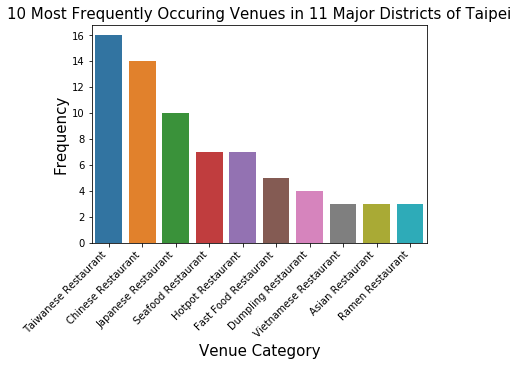

<Figure size 1296x504 with 0 Axes>

In [383]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data = Taipei_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 11 Major Districts of Taipei', fontsize = 15)
plt.xlabel("Venue Category", fontsize = 15)
plt.ylabel ("Frequency", fontsize = 15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

#### Analyze Each Neighborhood

In [389]:
Taipei_Venues_restaurant = Taipei_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Taipei_Venues_restaurant

Neighborhood
Beitou                  4
Daan (Da-an, Da'an)     3
Nangang (Nankang)      14
Neihu                   1
Shilin                 14
Songshan                9
Wanhua                  7
Wenshan                 8
Xinyi                  13
Zhongshan              11
Zhongzheng              8
Name: Venue Category, dtype: int64

### 🔸 Results

### 🔸 Discussion

### 🔸 Conclusion